# Hello Algorithmic Trading: a journey into the world of automated profits

## Introduction
As an engineer, I find joy in exploring various technologies and learning about the diverse areas where they can be applied. Algorithmic trading is one such fascinating field that is not only challenging but also quite intriguing. The prospect of writing a trading bot that can generate profits is exciting, albeit a bit misleading.

~~~
To develop a profitable algorithm that can generate consistent long-term profits, one needs to invest years in the field, collaborate with experts, conduct extensive research, and continuously improve both their skills and the algorithm itself.
~~~

I find this field an excellent platform to hone my Python programming and Data Science skills. Moreover, it’s an international competition to generate returns that surpass the market’s return (finding an Alpha), making it an engaging hobby. So, let’s dive into the world of algorithmic trading.

## The strategy
The Moving Average Crossover Strategy is a widely used technical analysis technique among traders. It helps identify potential trend changes and generate buy and sell signals. This strategy involves using two or more moving averages of different periods and plotting them on a price chart. The two most commonly used moving averages in this strategy are the 50-day moving average (MA50) and the 200-day moving average (MA200). The principle behind this strategy is simple: the MA50 crossing above the MA200 indicates a bullish trend, while the MA50 crossing below the MA200 suggests a bearish trend. Traders often use this strategy in conjunction with other technical analysis tools and indicators to confirm signals and make informed trading decisions. However, it’s crucial to note that this strategy may not be effective in all market conditions.

~~~
Therefore, traders should always conduct proper risk management and due diligence before executing any trades.
~~~

## Setting up the environment
For this example, we’ll use Bitcoin prices. To start, you need to create a Notebook. Google Colab is a convenient tool for such experiments as it eliminates the need to install anything on your computer. Once you have a notebook, you can either copy and paste the code from snippets or type it manually in separate cells. To run the code within a cell, simply activate the cell and press shift + enter.

Let’s begin by installing the necessary library on our Google Colab Notebook.

In [ ]:
# Install yfinance on the system
!pip install yfinance seaborn

After running this cell, you will receive information related to the installation as an output. Everything should already be installed on the system.

## Importing libraries
Now, we can import all the libraries we’ll need for this exercise.

In [1]:
# Yahoo Finance is used for data fetching
import yfinance as yf
# Pandas and numpy are used for data manipulation
import pandas as pd
import numpy as np
# Matplotlib and seaborn are used for plotting graph
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

## Data preparation
Next, we’ll download Bitcoin prices from Yahoo Finance.

In [2]:
# Pull Bitcoin prices for the entire accessible date range.
data = yf.download('BTC-USD')
# Display 5 first and 5 last rows of the data
data

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800
2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200
2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700
2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600
2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100
...,...,...,...,...,...,...
2023-09-02,25800.910156,25970.285156,25753.093750,25868.798828,25868.798828,10100387473
2023-09-03,25869.472656,26087.148438,25817.031250,25969.566406,25969.566406,8962524523
2023-09-04,25968.169922,26081.525391,25657.025391,25812.416016,25812.416016,10680635106


Let’s examine a summary of the data distribution.

In [3]:
# Show summary statistics for each numerical column
data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,3277.000000,3277.000000,3277.000000,3277.000000,3277.000000,3.277000e+03
mean,13880.383283,14211.789930,13516.365457,13886.755588,13886.755588,1.651282e+10
std,15995.074758,16388.485714,15545.034075,15991.562058,15991.562058,1.936028e+10
min,176.897003,211.731003,171.509995,178.102997,178.102997,5.914570e+06
25%,778.963013,782.033997,772.909973,780.086975,780.086975,1.353850e+08
50%,7913.616211,8134.831543,7696.391113,7916.879883,7916.879883,1.063864e+10
75%,21233.609375,21646.203125,20778.179688,21239.753906,21239.753906,2.724246e+10
max,67549.734375,68789.625000,66382.062500,67566.828125,67566.828125,3.509679e+11


## Visualization
Now that we have some data to work with and a general understanding of it, let’s create a visualization.

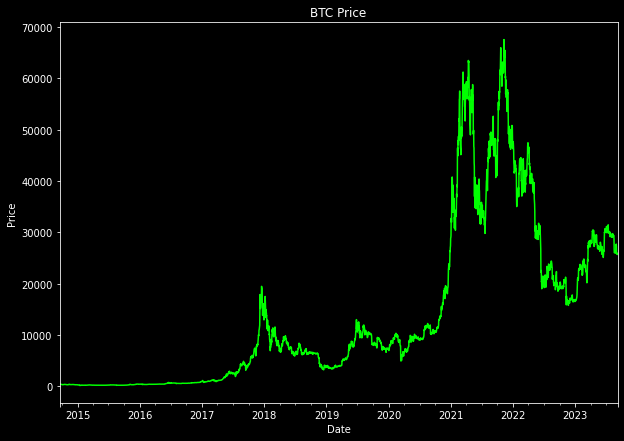

In [4]:
# set the figure background color to black
plt.style.use('dark_background')
# Create a graph that displays the price of BTC over time.
data['Close'].plot(figsize=(10, 7), color='lime')
plt.title('BTC Price')
plt.ylabel('Price')
plt.show()

## Analyzing the Moving Averages
Next, we’ll examine the long and short moving averages more closely.

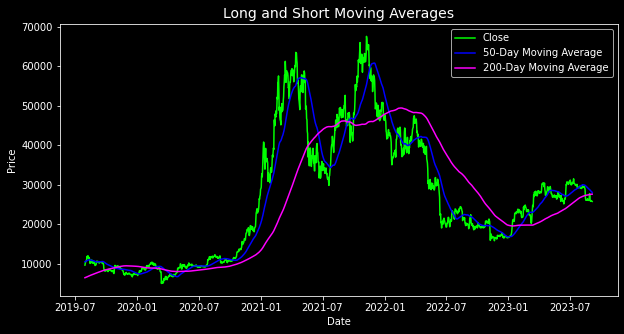

In [5]:
# Define long and short window
short_window = 50
long_window = 200
# Calculate moving averages
data['short_mavg'] = data['Close'].rolling(short_window).mean()
data['long_mavg'] = data['Close'].rolling(long_window).mean()
# Plot close price and moving averages
plot_data = data[-1500:]
plt.figure(figsize=(10, 5))
plt.title('Long and Short Moving Averages', fontsize=14)
plt.xlabel('Date')
plt.ylabel('Price')
plt.plot(plot_data['Close'], label='Close', color='lime')
plt.plot(plot_data['short_mavg'], label='50-Day Moving Average', color='blue')
plt.plot(plot_data['long_mavg'], label='200-Day Moving Average', color='magenta')
plt.legend()

## Signal Generation and Strategy Evaluation
To visualize the buy or sell signals based on the moving average crossover, we need to compare the short and long moving averages and record the relevant signals in the dataframe.

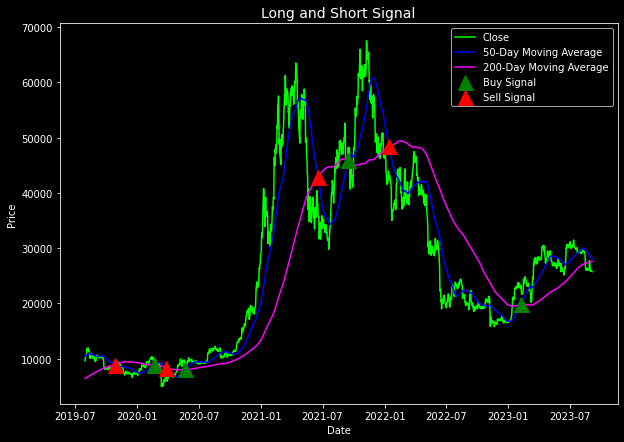

In [6]:
# Take long positions
data['long_positions'] = np.where(data['short_mavg'] > data['long_mavg'], 1, 0)
# Take short positions
data['short_positions'] = np.where(data['short_mavg'] < data['long_mavg'], -1, 0)
# Let's put our decision in terms of buying (1) and selling(-1) into a new column "positions"
data['positions'] = data['long_positions'] + data['short_positions']
# Plot close price and moving averages
plot_data = data[-1500:]
plt.figure(figsize=(10, 7))
plt.title('Long and Short Signal', fontsize=14)
plt.xlabel('Date')
plt.ylabel('Price')
plt.plot(plot_data['Close'], label='Close', color='lime')
plt.plot(plot_data['short_mavg'], label='50-Day Moving Average', color='blue')
plt.plot(plot_data['long_mavg'], label='200-Day Moving Average', color='magenta')
plt.plot(plot_data[(plot_data['long_positions'] == 1) &
(plot_data['long_positions'].shift(1) == 0)]['short_mavg'],
'^', ms=15, label='Buy Signal', color='green')
plt.plot(plot_data[(plot_data['short_positions'] == -1) &
(plot_data['short_positions'].shift(1) == 0)]['short_mavg'],
'^', ms=15, label='Sell Signal', color='red')
plt.legend()
plt.show()

## Evaluation metrics
Returns can be a simple metric to evaluate a trading strategy. Let’s compute and visualize it.

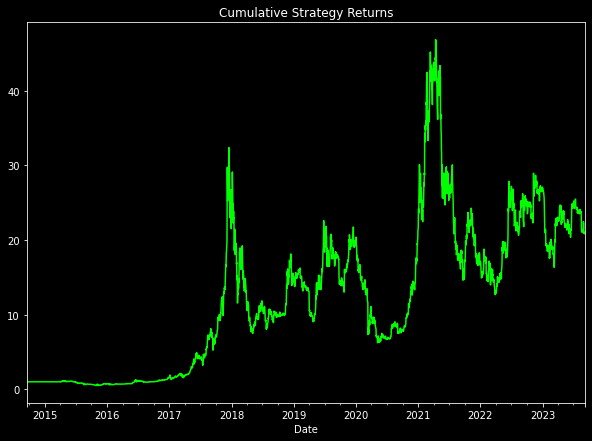

In [7]:
# Calculate daily returns
data['returns'] = data['Close'].pct_change()
# Calculate strategy returns
data['strategy_returns'] = data['returns'] * data['positions'].shift(1)
# Plot cumulative returns
cumulative_returns = (data['strategy_returns'] + 1).cumprod()
cumulative_returns.plot(figsize=(10, 7), color='lime')
plt.title('Cumulative Strategy Returns')
plt.show()

However, in practice, it’s better to use a combination of metrics for evaluating the effectiveness of your strategy.

In [8]:
# Total number of trading days
days = len(cumulative_returns)
# Calculate compounded annual growth rate
annualized_returns = (cumulative_returns.iloc[-1]**(365/days)-1)*100
# Calculate annualized volatility
annualized_volatility = np.std(data.strategy_returns)*(365**0.5)*100
# Assume an average annual risk-free rate is 1%
risk_free_rate = 0.01/365
# Calculate Sharpe Ratio
sharpe_ratio = np.sqrt(365)*(np.mean(data.strategy_returns) -
(risk_free_rate))/np.std(data.strategy_returns)
# Calculate the running maximum
running_max = np.maximum.accumulate(cumulative_returns.dropna())
# Ensure the value never drops below 1
running_max[running_max < 1] = 1
# Calculate the percentage drawdown
drawdown = (cumulative_returns)/running_max - 1
max_dd = drawdown.min()*100
print('The annualized returns of strategy is %.2f' % annualized_returns + '%')
print('The annualized volatility of strategy is %.2f' % annualized_volatility + '%')
print('The sharpe ratio is %.2f' % sharpe_ratio)
print('The percentage drawdown is %.2f' % max_dd + '%')

The annualized returns of strategy is 40.25%
The annualized volatility of strategy is 68.66%
The sharpe ratio is 0.82
The percentage drawdown is -80.74%


Analyzing the backtesting results against your strategy is crucial. Here are my results:

- The annualized returns of the strategy are 43.54%
- The annualized volatility of the strategy is 69.06%
- The Sharpe ratio is 0.86
- The percentage drawdown is -80.74%

## Assumptions
Let’s make some assumptions based on these results:

- Annualized Returns (43.54%). The strategy has generated an annualized return of 43.54%. This suggests that, on average, the strategy has been profitable and has outperformed a risk-free investment like a treasury bill or savings account.

- Annualized Volatility (69.06%). The annualized volatility, also known as the standard deviation of returns, is 69.06%. A higher volatility indicates that the strategy experiences significant fluctuations in returns over time. This suggests that the strategy carries a considerable level of risk.

- Sharpe Ratio (0.86). The Sharpe ratio is a measure of risk-adjusted returns and represents the excess return per unit of risk. A Sharpe ratio of 0.86 indicates that the strategy is generating a positive return in excess of the risk-free rate (typically a treasury bill) but is not exceptionally high. It suggests that the strategy has a reasonable balance between returns and risk.

- Percentage Drawdown (-80.74%). The drawdown is a measure of the peak-to-trough decline in the value of the trading account. A drawdown of -80.74% indicates that the strategy has experienced a substantial loss from its highest point to its lowest point. This is a significant drawdown, and it indicates that the strategy has faced severe adverse movements in the market.

## Conclusion
Overall, we can assume that the trading strategy has shown the ability to generate positive returns on an annual basis, but it comes with relatively high volatility and significant drawdown risk. The Sharpe ratio of 0.86 suggests that the strategy has some level of risk management in place, but further analysis is needed to assess the strategy’s risk-adjusted performance and sustainability.

It’s essential to consider these factors in the context of your investment goals, risk tolerance, and overall portfolio diversification before deciding to invest in or adopt this trading strategy.

~~~
Historical performance does not guarantee future results, and rigorous analysis and risk management are necessary when evaluating any trading strategy.
~~~

Also, this is a simple backtest against the strategy which doesn’t include possible fees, commissions or other factors, but you have run through the simplified process of backtesting, **congratulations on this**!